In [1312]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1313]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [1314]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [1315]:
data.loc[data.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [1316]:
data.loc[(data.Square<15)|(data.Square>300),"Square"]=data["Square"].median()

In [1317]:
data.loc[data.Floor>data.HouseFloor,"HouseFloor"]=data.loc[data.Floor>data.HouseFloor,"Floor"]

In [1318]:
data.loc[(data.Square<data.LifeSquare)|(data.Square<data.KitchenSquare)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,20.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,4.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,5.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,7.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,165071.825722
212,1748,88,2.0,52.513310,67.628717,1.0,24,24.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,16.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,182228.520030


In [1319]:
square_lifesquare=(data.Square/data.LifeSquare).mean()
square_lifesquare

2.1461835291695524

In [1320]:
data["LifeSquare"]=data["LifeSquare"].fillna(data["Square"]/square_lifesquare)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [1321]:
data.dropna(subset=["LifeSquare"],axis=0)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,37.421276,0.0,14,14.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,30.058677,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [1322]:
data.loc[data.Rooms>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,3.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [1323]:
data.loc[data.HouseYear==20052011,"HouseYear"]=2008
data.loc[data.HouseYear==4968,"HouseYear"]=1968
data.loc[data.Rooms==10,"Rooms"]=2
data.loc[data.Rooms==19,"Rooms"]=1
data.loc[2170,"Rooms"]=2
data.loc[1454,"Rooms"]=1
data.loc[data.Rooms==0,"Rooms"]=1

In [1324]:
data.loc[data["Square"]>(data["Rooms"]*43+20),"Square"]=data["Rooms"]*43+20
data.loc[data["Square"]<(data["Rooms"]*17),"Square"]=data["Rooms"]*17

In [1325]:
train,valid=train_test_split(data,test_size=0.3,random_state=42)

In [1326]:
train.shape

(7000, 20)

In [1327]:
valid.shape

(3000, 20)

In [1328]:
scaler = MinMaxScaler()


In [1329]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])
train_scaled

array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [1330]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.34653985063
89.93632943287
75.48717749672792
63.45340020671637
56.389720100191404
50.12616448078286


Text(0.5, 1.0, 'INERTIA')

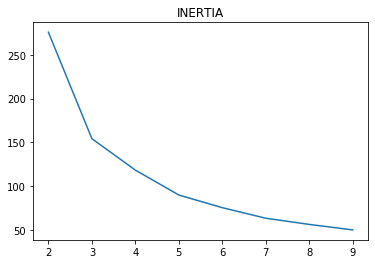

In [1331]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title("INERTIA")

In [1332]:
from sklearn.cluster import AgglomerativeClustering

In [1333]:
model=AgglomerativeClustering(n_clusters=5)

In [1334]:
train["cluster_year"]=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'TRAIN')

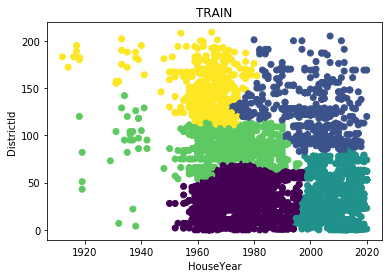

In [1335]:
plt.scatter(train["HouseYear"],train["DistrictId"],c=train["cluster_year"])
plt.xlabel("HouseYear")
plt.ylabel("DistrictId")
plt.title("TRAIN")

In [1336]:
from sklearn.neighbors import KNeighborsClassifier

In [1337]:
knn=KNeighborsClassifier(n_neighbors=5)

In [1338]:
knn.fit(train_scaled,train["cluster_year"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1339]:
valid_scaled=scaler.transform(valid.loc[:,["HouseYear","DistrictId"]])

In [1340]:
valid["cluster_year"]=knn.predict(valid_scaled)

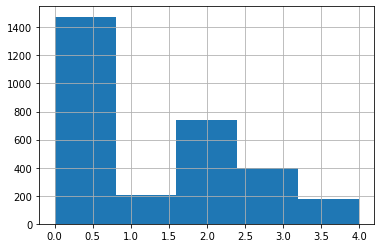

In [1341]:
valid["cluster_year"].hist(bins=5)

In [1342]:
distr_inf1=train["DistrictId"].value_counts().reset_index().rename(columns=({"DistrictId":"large_district","index":"DistrictId"}))

In [1343]:
distr_inf1["is_large"]=(distr_inf1["large_district"]>100).astype(int)

In [1344]:
distr_inf1.head(15)

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1
5,62,175,1
6,30,160,1
7,53,133,1
8,58,118,1
9,21,107,1


In [1345]:
def add_distr_inf(df,ditr_inf1):
    df=pd.merge(df,distr_inf1,on="DistrictId",how="left")
    df["is_large"]=df["is_large"].fillna(0)
    df["large_district"]=df["large_district"].fillna(1)
    return df

In [1346]:
price=train["Price"].mean()
price

214449.1673897029

In [1347]:
price_mean_by_rooms=train.groupby(["Rooms"],as_index=False).agg({"Price":"mean"}).rename(columns={"Price":"mean_price_by_rooms"})
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,1.0,160150.407652
1,2.0,215330.295609
2,3.0,290867.452543
3,4.0,385776.526291
4,5.0,386743.536446


In [1348]:
price_mean_by_distr_rooms=train.groupby(["DistrictId","Rooms"],as_index=False).agg({"Price":"mean"}).rename(columns={"Price":"mean_price_by_dr"})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [1349]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=["DistrictId","Rooms"],how="left")
    df=pd.merge(df,price_mean_by_rooms,on=["Rooms"],how="left")
    df["mean_price_by_dr"]=df["mean_price_by_dr"].fillna(df["mean_price_by_rooms"])
    df["mean_price_by_dr"]=df["mean_price_by_dr"].fillna(price)
    df["mean_price_by_rooms"]=df["mean_price_by_rooms"].fillna(price)
    return df

In [1350]:
def prepare_data(df,distr_inf1,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_inf(df,distr_inf1)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [1351]:
train=prepare_data(train,distr_inf1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [1352]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 25 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             7000 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_year  

In [1353]:
def dummies(df,feature="cluster_year"):
    df[feature]=df[feature].astype(object)
    df=pd.get_dummies(df)
    return df

In [1354]:
train=dummies(train)

In [1355]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'cluster_year_4'],
      dtype='object')

In [1356]:
feats=['large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'cluster_year_4']

In [1357]:
from sklearn.ensemble import RandomForestRegressor as RF

In [1358]:
from sklearn.model_selection import GridSearchCV

In [1359]:
params={"min_samples_leaf":[3,5,7,10],
       "n_estimators":[25,75,125,175],
        "max_depth":[3,5,7]
       }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [1360]:
regr.fit(train.loc[:,feats],train["Price"])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

In [1361]:
regr.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 75}

In [1362]:
regr.best_score_

0.6698893900263275

In [1363]:
RFR=RF(max_depth=5, min_samples_leaf=5, n_estimators=10, random_state=175)

In [1364]:
%%time
RFR.fit(train.loc[:,feats],train["Price"])

Wall time: 107 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=175, verbose=0,
                      warm_start=False)

In [1365]:
valid=prepare_data(valid,distr_inf1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [1366]:
valid=dummies(valid)

In [1367]:
y_pred=RFR.predict(valid.loc[:,feats])

In [1368]:
from sklearn.metrics import r2_score as r2

In [1369]:
r2(valid["Price"],y_pred)

0.5488632692928246

In [1370]:
r2(train["Price"],RFR.predict(train.loc[:,feats]))

0.6884440297949794

In [1371]:
test_scaled=scaler.transform(test.loc[:,["HouseYear","DistrictId"]])
test["cluster_year"]=knn.predict(test_scaled)

In [1372]:
test=prepare_data(test,distr_inf1,price_mean_by_distr_rooms,price_mean_by_rooms,price)
test=dummies(test)

In [1373]:
test["Price"]=RFR.predict(test.loc[:,feats])

In [1374]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,1,0,1,1,0,0,0,0,170814.014109
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,0,1,0,1,0,0,0,1,0,233295.689413
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,1,0,1,0,0,0,0,1,157596.859595
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,1,0,1,0,0,1,0,0,213507.108259
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,1,1,0,0,0,1,0,0,125707.431239


In [1375]:
test[["Id","Price"]].to_csv("PEliseeva_predictions.csv",index=None)